In [ ]:
import sklearn
import pandas as pd

ds = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


Pas de valeurs manquantes pour toutes les
colonnes. Donc pas d'imputation/suppression

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Toutes les données sont de types numérique

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Le tableau ci dessus fournis un résumé des caractéristiques de chaque colonne, comme la moyenne, l'écart type, le minimum, ...

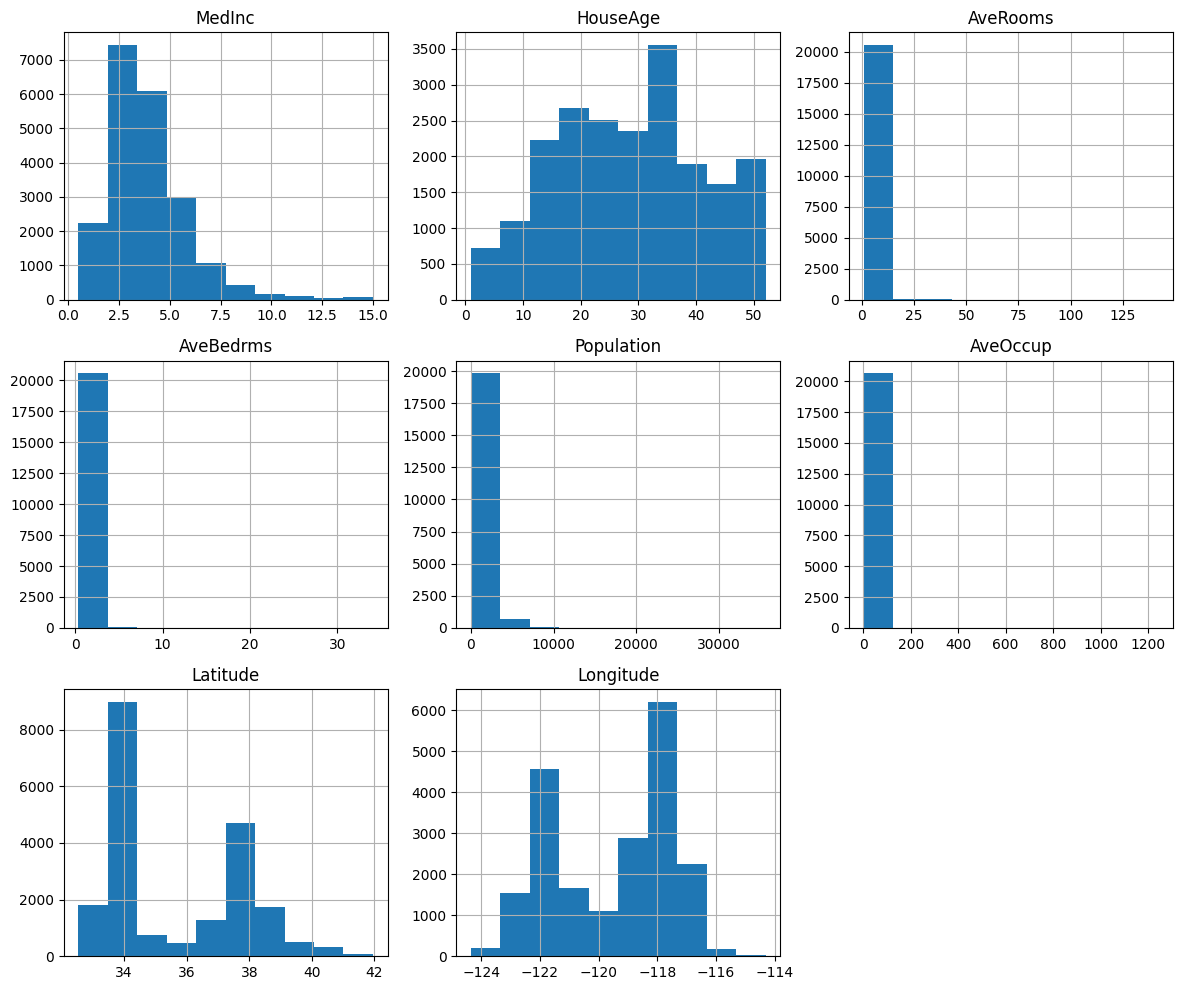

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

Ces graphiques d'histogramme permettent de visualiser la distribution de chaque caracteristique.

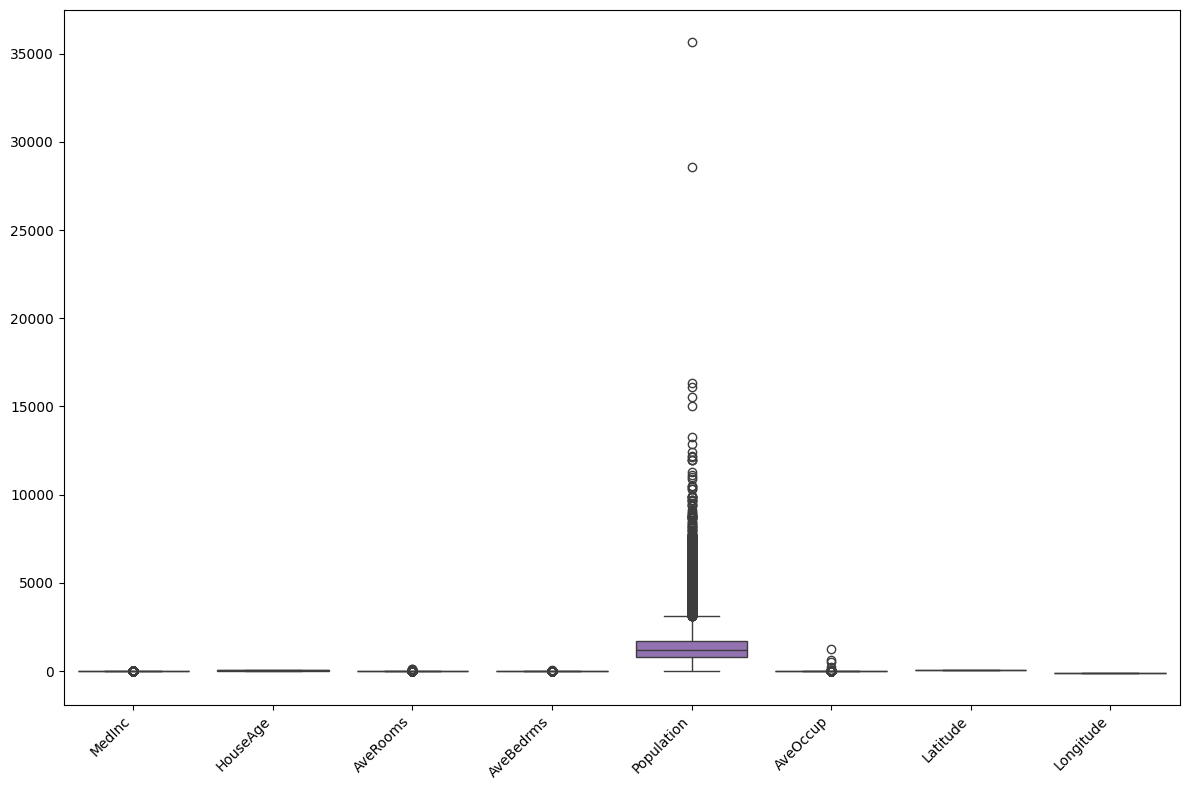

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Ici on peut identifier les valeurs extremes a partir du boxplot.

In [ ]:
df['MedHouseVal'] = ds.target

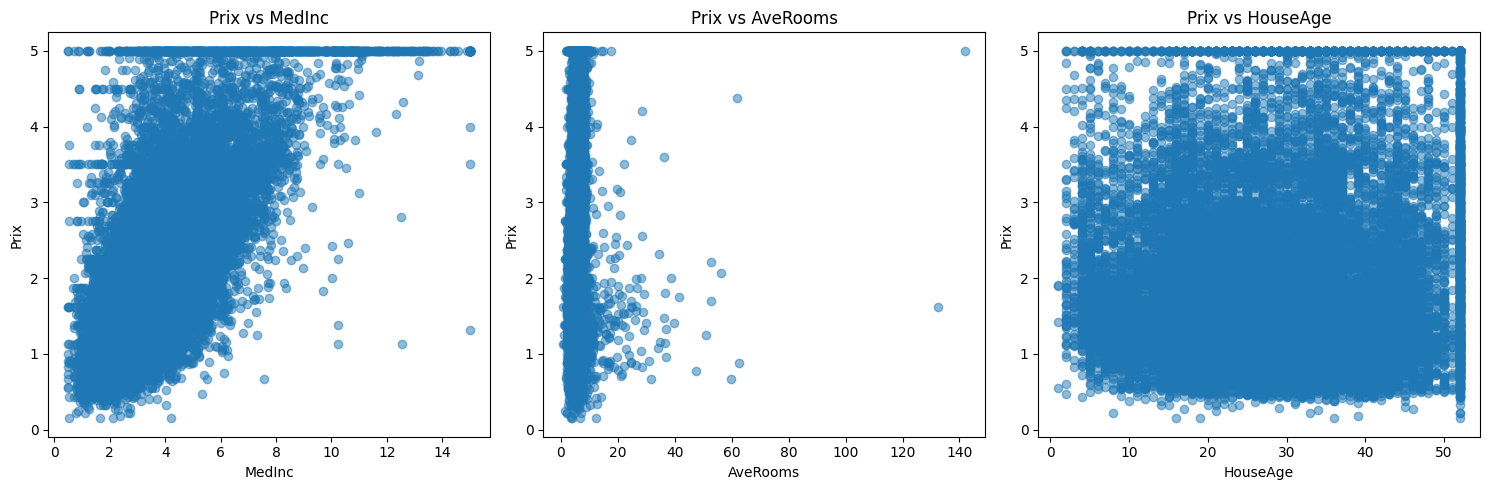

In [ ]:
plt.figure(figsize=(15, 5))

# Scatter plot: Prix vs MedInc
plt.subplot(1, 3, 1)
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5)
plt.title('Prix vs MedInc')
plt.xlabel('MedInc')
plt.ylabel('Prix')

# Scatter plot: Prix vs AveRooms
plt.subplot(1, 3, 2)
plt.scatter(df['AveRooms'], df['MedHouseVal'], alpha=0.5)
plt.title('Prix vs AveRooms')
plt.xlabel('AveRooms')
plt.ylabel('Prix')

# Scatter plot: Prix vs HouseAge
plt.subplot(1, 3, 3)
plt.scatter(df['HouseAge'], df['MedHouseVal'], alpha=0.5)
plt.title('Prix vs HouseAge')
plt.xlabel('HouseAge')
plt.ylabel('Prix')

plt.tight_layout()
plt.show()

Affichage des relations entre le prix des maisons 'MedHouseVal' et ('MedInc', 'AveRooms', 'HouseAge')

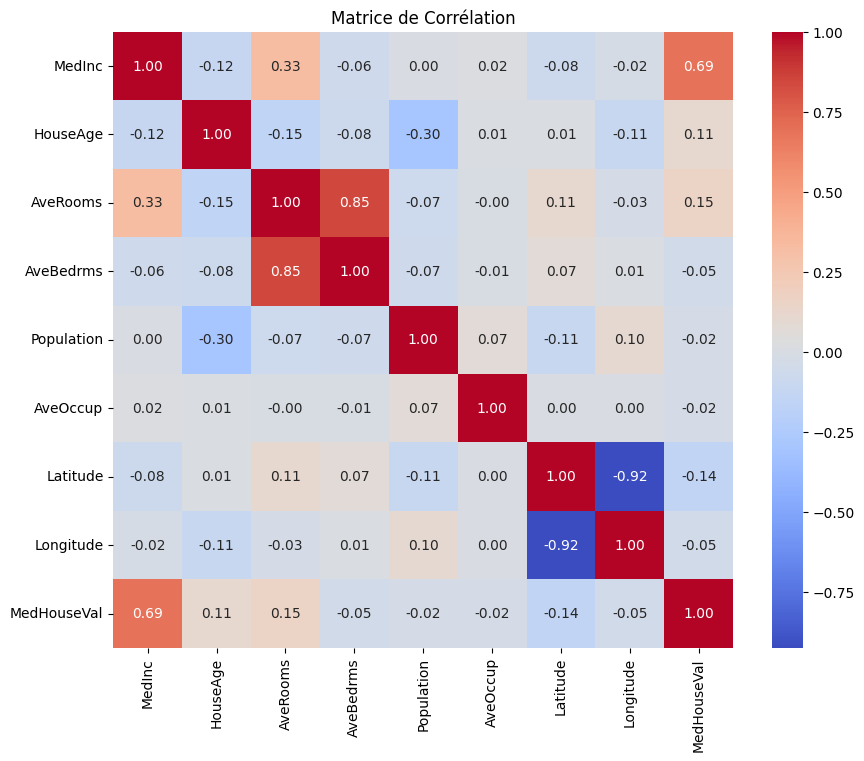

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

Affichage des coeffiscient de correlation de Pearson entre toutes les paires de variables.

In [ ]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

Definition des donnees sur les axes.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

Entrainement des donnees

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print("Taille de l'ensemble d'entraînement:", X_train.shape)
print("Taille de l'ensemble de validation:", X_val.shape)
print("Taille de l'ensemble de test:", X_test.shape)

Taille de l'ensemble d'entraînement: (12384, 8)
Taille de l'ensemble de validation: (4128, 8)
Taille de l'ensemble de test: (4128, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_val = model.predict(X_val_scaled)

mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Performance du modèle de Régression Linéaire sur l'ensemble de validation:")
print(f"MSE: {mse_val:.4f}")
print(f"MAE: {mae_val:.4f}")
print(f"R²: {r2_val:.4f}")

Performance du modèle de Régression Linéaire sur l'ensemble de validation:
MSE: 0.5326
MAE: 0.5336
R²: 0.5920


In [ ]:
from sklearn.linear_model import Ridge,Lasso

# Modèle Ridge
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge_val = ridge_reg.predict(X_val_scaled)

mse_ridge_val = mean_squared_error(y_val, y_pred_ridge_val)
mae_ridge_val = mean_absolute_error(y_val, y_pred_ridge_val)
r2_ridge_val = r2_score(y_val, y_pred_ridge_val)

print(f"\nRidge Regression:")
print(f"MSE: {mse_ridge_val:.4f}")
print(f"MAE: {mae_ridge_val:.4f}")
print(f"R²: {r2_ridge_val:.4f}")

# Modèle Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso_val = lasso_reg.predict(X_val_scaled)

mse_lasso_val = mean_squared_error(y_val, y_pred_lasso_val)
mae_lasso_val = mean_absolute_error(y_val, y_pred_lasso_val)
r2_lasso_val = r2_score(y_val, y_pred_lasso_val)

print(f"\nLasso Regression:")
print(f"MSE: {mse_lasso_val:.4f}")
print(f"MAE: {mae_lasso_val:.4f}")
print(f"R²: {r2_lasso_val:.4f}")

best_model = lasso_reg
print(f"\nLe meilleur modèle (basé sur les résultats de validation) est : {best_model.__class__.__name__}")


Ridge Regression:
MSE: 0.5326
MAE: 0.5336
R²: 0.5920

Lasso Regression:
MSE: 0.6824
MAE: 0.6244
R²: 0.4772

Le meilleur modèle (basé sur les résultats de validation) est : Lasso


In [ ]:
import numpy as np

y_pred_test = best_model.predict(X_test_scaled)

# Évaluer le modèle sur le set de test
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"\nÉvaluation finale sur le Test Set ({best_model.__class__.__name__}):")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R²: {r2_test:.4f}")


Évaluation finale sur le Test Set (Lasso):
MSE: 0.6787
MAE: 0.6206
R²: 0.5050


In [ ]:
print("\nCoefficients du meilleur modèle :")
coefficients = pd.DataFrame({'Feature': X_test.columns, 'Coefficient': best_model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))


Coefficients du meilleur modèle :
      Feature  Coefficient
0      MedInc     0.705514
1    HouseAge     0.104116
2    AveRooms    -0.000000
3   AveBedrms     0.000000
4  Population    -0.000000
5    AveOccup    -0.000000
7   Longitude    -0.000000
6    Latitude    -0.009920
